In [1]:
import numpy as np
import pandas as pd
np.random.seed(0)
df = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
                   'office_id': list(range(1, 7)) * 2,
                   'sales': [np.random.randint(100000, 999999)
                             for _ in range(12)]})


In [2]:
### best way to do this
state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = state_office.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [3]:
### another way (vlookup) way to do this
state_sum = df.groupby('state').sum()
state_sum.columns = ['office_id_', 'sales_total']

In [4]:
joined = df.join(state_sum)
joined['percent_state_total'] = joined['sales'] / joined['sales_total']
joined

,office_id,sales,state,office_id_,sales_total,percent_state_total
0,1,405711,CA,NaN,NaN,NaN
1,2,535829,WA,NaN,NaN,NaN
2,3,217952,CO,NaN,NaN,NaN
3,4,252315,AZ,NaN,NaN,NaN
4,5,982371,CA,NaN,NaN,NaN
5,6,459783,WA,NaN,NaN,NaN
6,1,404137,CO,NaN,NaN,NaN
7,2,222579,AZ,NaN,NaN,NaN
8,3,710581,CA,NaN,NaN,NaN
9,4,548242,WA,NaN,NaN,NaN


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [131]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/marshall132/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [132]:
# Quickly check to see the size of our DF, both rows and columns
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [133]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [134]:
# your code here
tristates = [9,34,36]
tri_df = df[df['_STATE'].isin(tristates)]

Now check to see how large our subset df.

In [135]:
# your code here
tri_df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [136]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [137]:
#your code here
zero_dict = {88:0,
            77: np.nan,
            99:np.nan}
df["PHYSHLTH"] = df['PHYSHLTH'].replace(zero_dict)

In [138]:
df['PHYSHLTH'].describe()


count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [139]:
# descriptive statistics
target = df['PHYSHLTH'].describe()
target

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

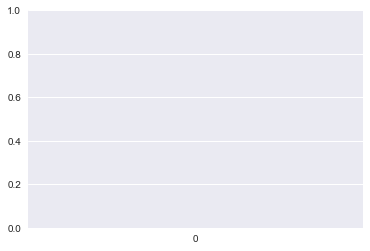

In [140]:
# graphic showing those descriptive stats
sns.set()
sns.boxplot()

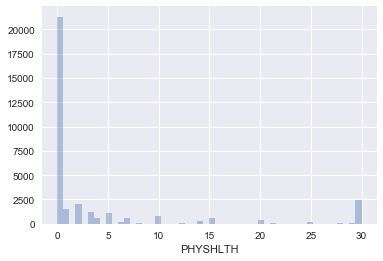

In [141]:
# graphic showing the distribution of data
sns.distplot(df['PHYSHLTH'].dropna(), kde=False)

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [142]:
# code to calculate the average number of sick days by state
mean_state = pd.DataFrame(df.groupby("_STATE")['PHYSHLTH'].mean()).reset_index()
mean_state



,_STATE,PHYSHLTH
0,9.0,3.688562
1,34.0,4.380957
2,36.0,4.148030


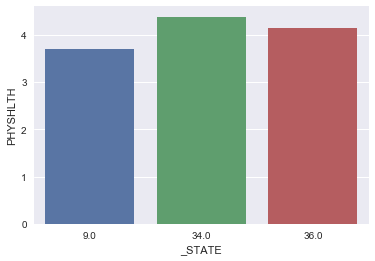

In [143]:
# code to graph those averages using matplotlib
mean_state
sns.barplot(x=mean_state['_STATE'], y=mean_state['PHYSHLTH'],data=mean_state)

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [144]:
# code to create new colum for chronically sick
upper_limit = df['PHYSHLTH'].dropna().mean() + (2*df['PHYSHLTH'].dropna().std())
df['chronic'] = df['PHYSHLTH'].map(lambda x : 1 if x > upper_limit else 0)
df[df['chronic']==1].shape

(2741, 359)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [145]:
# code to calculate averages per state
by_state = df.groupby('_STATE')['chronic'].mean()
by_state.axes


[Float64Index([9.0, 34.0, 36.0], dtype='float64', name='_STATE')]

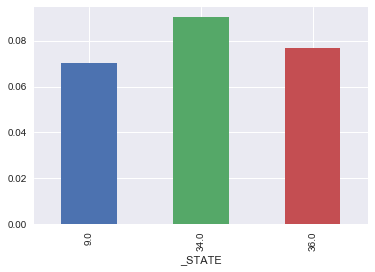

In [146]:
# create graphic to compare chronically sick by state
by_state.plot.bar()

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [147]:

# df['SMOKDAY2'].value_counts()
df.loc[pd.isna(df['SMOKDAY2'])& df['SMOKE100']==1, 'SMOKDAY2'] = 2
df[df['SMOKE100']==1]['SMOKDAY2'].value_counts(dropna=False)
# df[df['SMOKE100']==2]


3.0    9703
1.0    2676
2.0    1383
9.0      27
7.0       6
Name: SMOKDAY2, dtype: int64

In [148]:
# 0 = No smoking, 1 = some days, 2 = every day
smoke_codes = {3:0, 2:1, 1:2, 7: np.nan, 9:np.nan, np.nan:np.nan}
df['SMOKDAY2'] = df['SMOKDAY2'].replace(smoke_codes)

In [149]:
df['SMOKDAY2'].describe()

count    33074.000000
mean         0.787537
std          0.573717
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: SMOKDAY2, dtype: float64

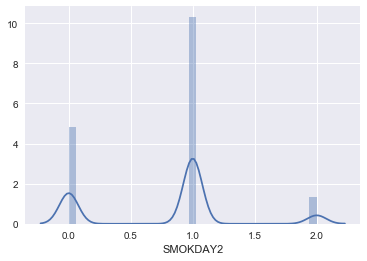

In [150]:
sns.distplot(df['SMOKDAY2'].dropna())

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [151]:
def convert_day(x):
    if 200<x<231:
        return x-200
    elif 101<=x<=107:
        return x-100
    elif x == 888:
        return 0
    else:
        return np.nan
    
        
df['ALCDAY5'].map(lambda x : convert_day(x))



49938      1.0
49939     30.0
49940      0.0
49941      3.0
49942      1.0
49943      4.0
49944     30.0
49945      4.0
49946      0.0
49947      5.0
49948      0.0
49949     30.0
49950      7.0
49951      0.0
49952      5.0
49953     15.0
49954      2.0
49955      1.0
49956      7.0
49957     20.0
49958      0.0
49959      3.0
49960      0.0
49961      0.0
49962     15.0
49963      2.0
49964     30.0
49965      7.0
49966      0.0
49967     14.0
          ... 
303749    20.0
303750     4.0
303751     3.0
303752     2.0
303753     2.0
303754     1.0
303755    15.0
303756     6.0
303757     7.0
303758    25.0
303759     5.0
303760     3.0
303761    10.0
303762     0.0
303763     3.0
303764     2.0
303765     4.0
303766     0.0
303767     0.0
303768     1.0
303769     2.0
303770     2.0
303771     4.0
303772     4.0
303773     8.0
303774     3.0
303775     0.0
303776     4.0
303777     NaN
303778    30.0
Name: ALCDAY5, Length: 34545, dtype: float64

In [152]:
df['ALCDAY5'] = df['ALCDAY5'].map(lambda x : convert_day(x))

In [153]:
df['ALCDAY5'].value_counts()

0.0     13043
1.0      4623
2.0      3556
3.0      2132
4.0      1530
5.0      1508
30.0     1164
7.0       988
10.0      840
20.0      650
15.0      590
6.0       498
8.0       369
25.0      265
12.0      144
28.0       56
14.0       53
29.0       31
9.0        28
27.0       24
18.0       19
16.0       15
26.0       15
24.0       14
22.0       13
21.0       13
13.0       11
11.0       10
17.0        7
23.0        2
19.0        1
Name: ALCDAY5, dtype: int64

In [154]:
def drink_clean(x):
    if 1<=x<=76:
        return x
    else:
        return 0
df['AVEDRNK2']= df['AVEDRNK2'].map(lambda x: drink_clean(x))

In [155]:
df['DRINKS_MONTH']= df['ALCDAY5']*df['AVEDRNK2']
df['DRINKS_MONTH'].describe()

count    32212.000000
mean         8.467621
std         27.950828
min          0.000000
25%          0.000000
50%          1.000000
75%          7.000000
max       2280.000000
Name: DRINKS_MONTH, dtype: float64

In [156]:
df.loc[df['DRINKS_MONTH'].idxmax(), 'DRINKS_MONTH'] = np.nan


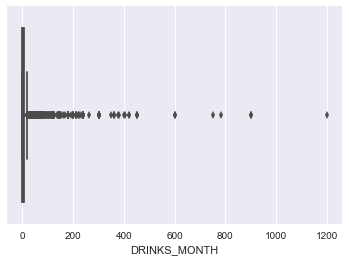

In [157]:
df['DRINKS_MONTH'].describe()
sns.boxplot(df['DRINKS_MONTH'])

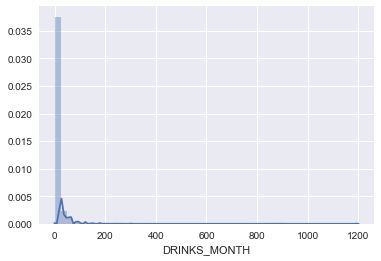

In [158]:
sns.distplot(df['DRINKS_MONTH'].dropna())


In [159]:
df['drinker'] = df['DRINKS_MONTH'].map(lambda x : 1 if x > 7 else 0)
df['drinker'].value_counts()


0    26839
1     7706
Name: drinker, dtype: int64

Text(0.5,1,'Avg Drinks Per Month by State')

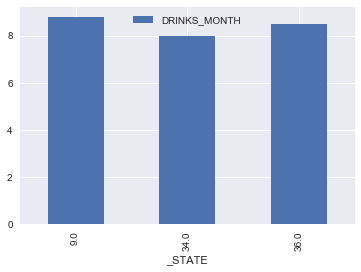

In [164]:
state_drinks = pd.DataFrame(df.groupby('_STATE')['DRINKS_MONTH'].mean())
state_drinks.plot.bar()
ax.set_title('Avg Drinks Per Month by State')

ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' kwarg instead.

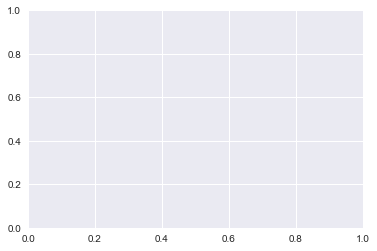

In [173]:
plt.scatter(df['ALCDAY5'], df['PHYSHLTH'], alpha=.2)
df['ALCDAY5'].corr(df['PHYSHLTH'])

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  